Peso de la evidencia (WoE)

In [2]:
import rasterio as rio
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import pandas as pd
import seaborn as sns
from pandas import DataFrame
import statsmodels.graphics.api as smg


Importamos los mapas

Mapa de pendiente

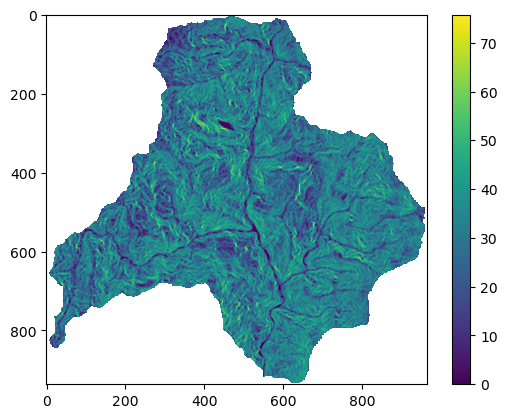

In [3]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Pendiente/pendiente1.tif?raw=true')
pendiente=raster.read(1)
pendiente=np.where(pendiente<0,np.nan,pendiente)
plt.imshow(pendiente)
plt.colorbar();


In [4]:
pendiente_vector=pendiente.ravel()  # para pasarlo a un vector
pendiente_vector_MenM=pendiente_vector[~np.isnan(pendiente_vector)] # para eliminar  del vector los datos NaN
pendiente_vector_MenM.shape # otra forma de saber las dimensiones

(484040,)

Mapa de curvatura

(484040,)

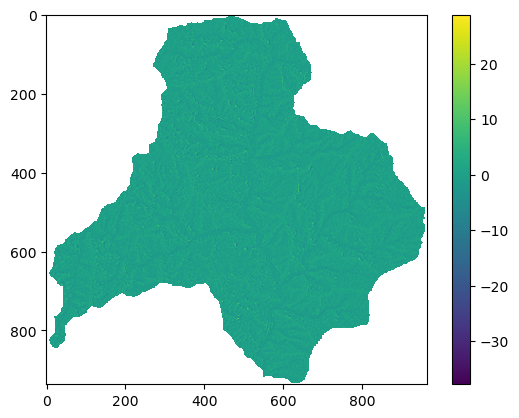

In [5]:

raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Curvatura/Curvatura_p12.tif?raw=true')
curvatura=raster.read(1)
curvatura=np.where(curvatura<-37.76,np.nan,curvatura)

plt.imshow(curvatura)
plt.colorbar()
curvatura_vector=curvatura.ravel()
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)]
curvatura_vector_MenM.shape
curvatura_vector=curvatura.ravel()  # para pasarlo a un vector
curvatura_vector_MenM=curvatura_vector[~np.isnan(curvatura_vector)] # para eliminar  del vector los datos NaN
curvatura_vector_MenM.shape # otra forma de saber las dimensiones


Mapa de flujo acumulado

(484040,)

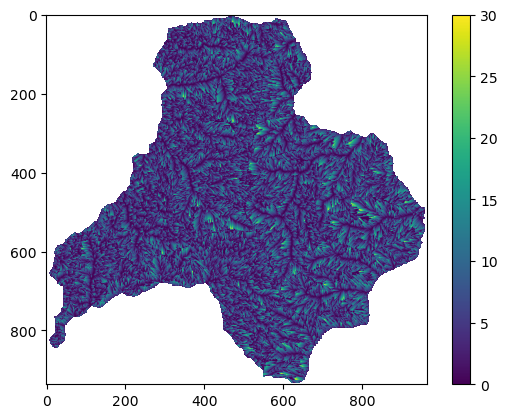

In [6]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Flujo%20acumulado/Flujoacum_11.tif?raw=true')
flujo=raster.read(1)
flujo=np.where(flujo<0,np.nan,flujo)
flujo=np.where(flujo>30,0,flujo)
flujo_vector=flujo.ravel()
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)]
plt.imshow(flujo)
plt.colorbar()
flujo.shape
flujo_vector_MenM.shape
flujo_vector=flujo.ravel()  # para pasarlo a un vector
flujo_vector_MenM=flujo_vector[~np.isnan(flujo_vector)] # para eliminar  del vector los datos NaN
flujo_vector_MenM.shape # otra forma de saber las dimensiones

Mapa de aspecto

(484040,)

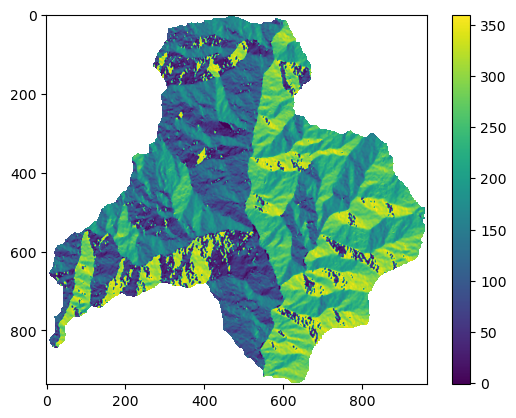

In [7]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Aspecto/Aspecto1.tif?raw=true')
aspecto=raster.read(1)
aspecto=np.where(aspecto<-100,np.nan,aspecto)
aspecto_vector=aspecto.ravel()
aspecto_vector_MenM=aspecto_vector[~np.isnan(aspecto_vector)]
plt.imshow(aspecto)
plt.colorbar()
aspecto_vector_MenM.shape

Mapa de geología

(484040,)

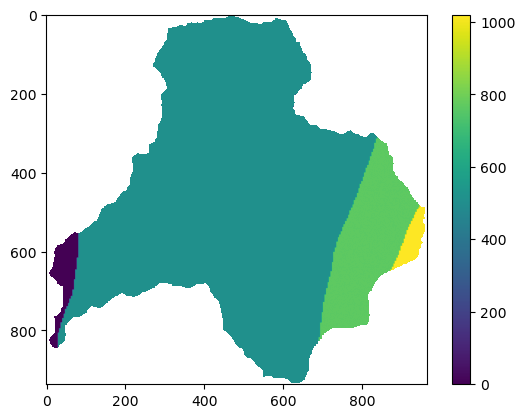

In [8]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Pendiente/pendiente1.tif?raw=true')
msk=raster.read_masks(1)
msk=np.where(msk==0,np.nan,msk)
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Geolog%C3%ADa/Geolog%C3%ADaF.tif?raw=true')
geologia=raster.read(1)

geologia=np.where(geologia<0,np.nan,geologia)

geologia_vector=geologia.ravel()


geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)]

geologia_vector_MenM.shape
geologia=msk*geologia
geologia=np.where(geologia==255,1,geologia)
plt.imshow(geologia)
plt.colorbar();
geologia_vector=geologia.ravel()  # para pasarlo a un vector
geologia_vector_MenM=geologia_vector[~np.isnan(geologia_vector)] # para eliminar  del vector los datos NaN
geologia_vector_MenM.shape # otra forma de saber las dimensiones

In [9]:
np.unique(geologia)

array([0.00e+00, 1.00e+00, 5.10e+02, 7.65e+02, 1.02e+03,      nan])

Importamos inventario

(484040,)

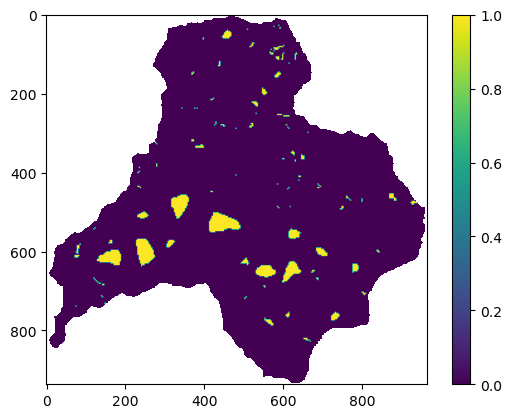

In [11]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Inventario/inventario.tif?raw=true')
inventario=raster.read(1)
raster_mask = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Pendiente/pendiente1.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
inventario=msk*inventario
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]
plt.imshow(inventario)
plt.colorbar()
inventario_vector_MenM.shape

Crear Dataframe

In [12]:
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'Curvatura':curvatura_vector_MenM,'flujo_acum':flujo_vector_MenM,'aspecto':aspecto_vector_MenM, 'geologia':geologia_vector_MenM}
df = pd.DataFrame(d)
print(list(df.columns))

['inventario', 'pendiente', 'Curvatura', 'flujo_acum', 'aspecto', 'geologia']


In [13]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Inventario/inventario.tif?raw=true')
inventario=raster.read(1)
raster_mask = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Pendiente/pendiente1.tif?raw=true')
msk=raster_mask.read_masks(1)
msk=np.where(msk==255,1,np.nan)
inventario=msk*inventario
inventario_vector=inventario.ravel()
inventario_vector_MenM=inventario_vector[~np.isnan(inventario_vector)]


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 484040 entries, 0 to 484039
Data columns (total 6 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   inventario  484040 non-null  float64
 1   pendiente   484040 non-null  float32
 2   Curvatura   484040 non-null  float32
 3   flujo_acum  484040 non-null  float32
 4   aspecto     484040 non-null  float32
 5   geologia    484040 non-null  float64
dtypes: float32(4), float64(2)
memory usage: 14.8 MB


Graficas para categorizar las variables

In [15]:
from pandas import DataFrame
d={'inventario':inventario_vector_MenM,'pendiente':pendiente_vector_MenM,'Curvatura':curvatura_vector_MenM,'flujo_acum':flujo_vector_MenM,'aspecto':aspecto_vector_MenM, 'geologia':geologia_vector_MenM}
df = pd.DataFrame(d)
df.head()

,inventario,pendiente,Curvatura,flujo_acum,aspecto,geologia
0,0.0,14.068556,1.28,0.0,118.610458,510.0
1,0.0,18.160751,1.28,0.0,127.568596,510.0
2,0.0,17.216877,-0.00,0.0,121.809387,510.0
3,0.0,19.485619,0.64,1.0,137.290604,510.0
4,0.0,20.243055,0.64,1.0,139.398712,510.0


In [16]:
var_names2=['aspecto','pendiente']
for var in var_names2:
    df[var]=(df[var]-df[var].mean())/df[var].std()
df.head()

,inventario,pendiente,Curvatura,flujo_acum,aspecto,geologia
0,0.0,-1.601045,1.28,0.0,-0.637368,510.0
1,0.0,-1.198484,1.28,0.0,-0.545700,510.0
2,0.0,-1.291335,-0.00,0.0,-0.604634,510.0
3,0.0,-1.068153,0.64,1.0,-0.446214,510.0
4,0.0,-0.993641,0.64,1.0,-0.424642,510.0


In [17]:
print(df.isnull().sum())

inventario    0
pendiente     0
Curvatura     0
flujo_acum    0
aspecto       0
geologia      0
dtype: int64


In [18]:
import statsmodels.formula.api as sfm
lr   = sfm.logit(formula = "inventario ~ pendiente + Curvatura + flujo_acum + aspecto + C(geologia)", data = df).fit()
print(lr.summary())

         Current function value: 0.151995
         Iterations: 35


C:\Users\Jose Manuel\anaconda3\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                           Logit Regression Results                           
Dep. Variable:             inventario   No. Observations:               484040
Model:                          Logit   Df Residuals:                   484031
Method:                           MLE   Df Model:                            8
Date:                Tue, 21 Nov 2023   Pseudo R-squ.:                 0.02178
Time:                        21:40:12   Log-Likelihood:                -73572.
converged:                      False   LL-Null:                       -75210.
Covariance Type:            nonrobust   LLR p-value:                     0.000
                            coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------
Intercept               -15.4983    114.670     -0.135      0.892    -240.248     209.252
C(geologia)[T.1.0]       11.1913    114.670      0.098      0.922    -213.559     235.941
C(geolog

In [19]:
X=df.drop("inventario", axis=1)
y=df['inventario']
X.head()

,pendiente,Curvatura,flujo_acum,aspecto,geologia
0,-1.601045,1.28,0.0,-0.637368,510.0
1,-1.198484,1.28,0.0,-0.545700,510.0
2,-1.291335,-0.00,0.0,-0.604634,510.0
3,-1.068153,0.64,1.0,-0.446214,510.0
4,-0.993641,0.64,1.0,-0.424642,510.0


In [20]:
dummy_geologia=pd.get_dummies(X['geologia'],prefix='geo')
column_name=X.columns.values.tolist()
column_name.remove('geologia')
X1=X[column_name].join(dummy_geologia)
X1.head()

,pendiente,Curvatura,flujo_acum,aspecto,geo_0.0,geo_1.0,geo_510.0,geo_765.0,geo_1020.0
0,-1.601045,1.28,0.0,-0.637368,0,0,1,0,0
1,-1.198484,1.28,0.0,-0.545700,0,0,1,0,0
2,-1.291335,-0.00,0.0,-0.604634,0,0,1,0,0
3,-1.068153,0.64,1.0,-0.446214,0,0,1,0,0
4,-0.993641,0.64,1.0,-0.424642,0,0,1,0,0


In [21]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(class_weight='balanced', solver='newton-cg')
model

LogisticRegression(class_weight='balanced', solver='newton-cg')

In [22]:
result=model.fit(X1,y)
print(result.coef_)

[[ 2.2395691e-01 -4.0270612e-03  6.5371278e-03 -2.6309347e-01
  -1.9937090e+00  1.0510597e+00  2.0646276e+00  1.4127628e+00
  -4.3238163e+00]]


C:\Users\Jose Manuel\anaconda3\Lib\site-packages\scipy\optimize\_linesearch.py:306: LineSearchWarning: The line search algorithm did not converge
  warn('The line search algorithm did not converge', LineSearchWarning)
C:\Users\Jose Manuel\anaconda3\Lib\site-packages\sklearn\utils\optimize.py:204: UserWarning: Line Search failed
  warnings.warn("Line Search failed")


In [23]:
y_pred=result.predict(X1)
y_pred

array([0., 0., 0., ..., 0., 0., 1.])

In [24]:
y_prob=result.predict_proba(X1)
y_prob

array([[0.5497858 , 0.4502142 ],
       [0.5333918 , 0.46660823],
       [0.53342545, 0.46657458],
       ...,
       [0.53011453, 0.46988547],
       [0.51694584, 0.48305413],
       [0.49200678, 0.5079932 ]], dtype=float32)

In [25]:
y_probs=result.predict_proba(X1)[:,1]
y_probs

array([0.4502142 , 0.46660823, 0.46657458, ..., 0.46988547, 0.48305413,
       0.5079932 ], dtype=float32)

In [26]:
pendiente_vector2=np.nan_to_num(pendiente_vector)
aspecto_vector2=np.nan_to_num(aspecto_vector)
geologia_vector2=np.nan_to_num(geologia_vector)
curvatura_vector2=np.nan_to_num(curvatura_vector)
flujo_vector2=np.nan_to_num(flujo_vector)
geologia_vector2=np.nan_to_num(geologia_vector)

In [43]:
f={'pendiente':pendiente_vector2,'Curvatura':curvatura_vector2,'flujo_acum':flujo_vector2,'aspecto':aspecto_vector2,'geologia':geologia_vector2}
x_map=pd.DataFrame(f)
dummy_geologia=pd.get_dummies(x_map['geologia'],prefix='geo')
column_name=x_map.columns.values.tolist()
column_name.remove('geologia')
x_map=x_map[column_name].join(dummy_geologia)


In [44]:
y_pred=model.predict_proba(x_map)[:,1]

In [45]:
raster = rio.open('https://github.com/JM19S/Cartografia_Geotecnica/blob/main/Python/Pendiente/pendiente1.tif?raw=true')
pendiente=raster.read(1)

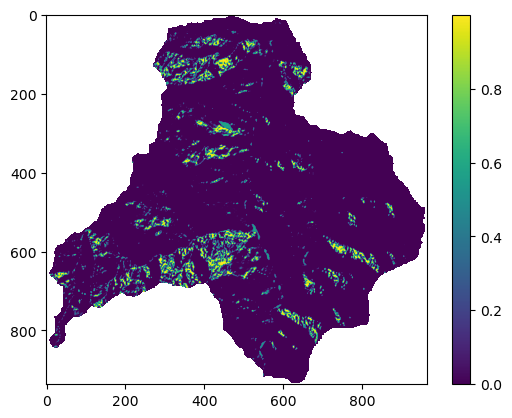

In [46]:
IS=y_pred.reshape(pendiente.shape)
IS=np.where(pendiente<0,np.nan,IS)
plt.imshow(IS)
plt.colorbar();